Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
        
        
   #### Objective:
        Implement Linear Regression and Stochastic Gradient Descent(SGD) with Linear regression. 
 
   

   

###  1. OBJECTIVE :- Implement SGD on Linear Regression

In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd

# Loading Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Shape of dataset
print(boston.data.shape)

(506, 13)


In [2]:
print(boston.data.shape)

(506, 13)


In [4]:
# shaper of target values
print(boston.target.shape)

(506,)


## Implementing SGD on LINEAR REGRESSION

In [5]:
# Feature matrix
data = boston.data

# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardised_data = sc.fit_transform(data)

# Adding a new feature to the data which will contain only ones for ease in computation 
additional_feature = np.ones(boston.data.shape[0])

# Matrix having new additional feature X0 which will be multiplied with W0 for the ease of computation
feature_data = np.vstack((additional_feature,standardised_data.T)).T

# Actual prices of houses
target_price = boston.target


# Stochastic Gradient Descent Algorithm :
# Let 'K' be the number of random rows selected out of the dataset
# Initialize the weight vector
#Let r = learning_rate and m = number of training_examples
# Let r =1
# repeat until convergence {
#    weight[j] = weight[j] - (r/m)*((Σfrom i=1 to K)of(((weight.T * feature_data[i]) - target_price[i])* feature_data[i,j])
#    r /= 2  
#}

# Final hypothesis for linear regression
# predicted_prices = (final_weights.T)*(test_data_matrix)


# Train and Test split of data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, target_price, test_size = 0.3, random_state = 5)

### IMPLEMENTING STOCHASTIC GRADIENT DESCENT ALGORITHM

In [7]:
# Initialising weight vector
# Generating 14 normally distributed values
weights = np.random.normal(0,1,feature_data.shape[1])

# Initialised Weights
weights

array([ 0.819984  ,  0.25594205,  1.21302193,  1.71955005,  0.40728424,
        1.32308111, -0.04055871, -1.00089136,  0.84845522, -1.87672096,
       -0.5937364 ,  1.11915941,  1.29581952, -2.209716  ])

In [8]:
# Temporary vector to store intermediate computed weight values
temp_w = np.zeros(feature_data.shape[1])

# Initialising learning rate
r = 0.001

# Number of training examples
m = X_train.shape[0]

# Code to get batches for Stochastic Gradient Descent
# batch size
batch_size = 20
from numpy import random
random_ids = random.choice(m,m,replace=False)
X_shuffled = X_train[random_ids,:]
y_shuffled = Y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]


# Number of iterations for training the data
iterations = 1000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,feature_data.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( sc.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
        weights = temp_w
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = weights

In [9]:
# Now predicting the house prices on X_test data
manual_sgd_predictions = np.zeros(X_test.shape[0])
for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions[itr] = np.sum(sc.inverse_transform(weights[1:14]*X_test[itr,1:])) + weights[0]*X_test[itr,0]

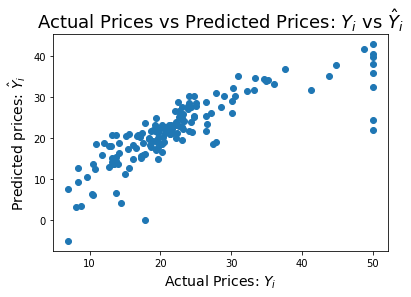

In [10]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, manual_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

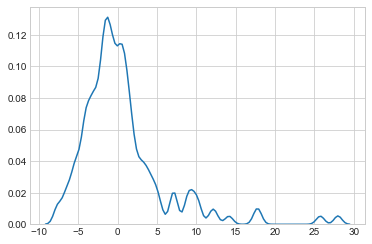

In [11]:
delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5)
plt.show()

In [12]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD from Scratch is : ",mean_absolute_error(Y_test, manual_sgd_predictions))
print("Mean Squared Error for Implementation of SGD from Scratch is : ",mean_squared_error(Y_test, manual_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD from Scratch is : ",np.sqrt(mean_squared_error(Y_test,manual_sgd_predictions)))

Mean Absolute Error for Implementation of SGD from Scratch is :  3.595743055083016
Mean Squared Error for Implementation of SGD from Scratch is :  30.439715632553604
Root Mean Squared Error for Implementation of SGD from Scratch is :  5.5172199188136055


## Implementing SKLEARN's SGD Regression

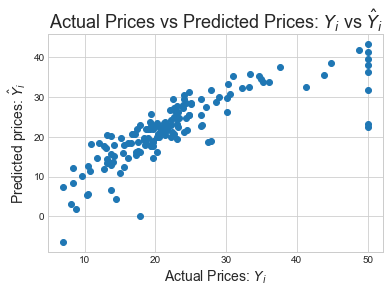

In [13]:

# Implement Sklearn SGD with following parameters as used in manual SGD :
#  (1) No regularization (2) Learning_rate = 0.001 and (3) Number of iterations = 1000

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001  )
sgd.fit(X_train, Y_train)

sklearn_sgd_predictions = sgd.predict(X_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(Y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

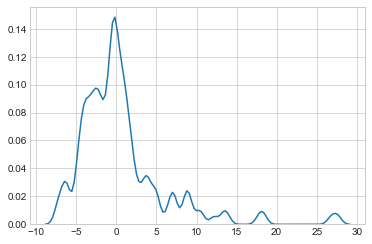

In [14]:
delta_y = Y_test - sklearn_sgd_predictions;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

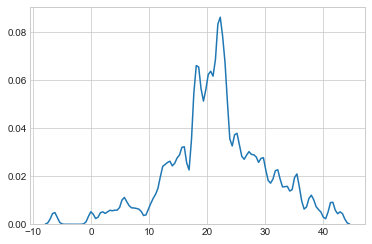

In [15]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [16]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(Y_test,sklearn_sgd_predictions))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(Y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(Y_test,sklearn_sgd_predictions)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.5711993356036342
Mean Squared Error for Implementation of SGD using SKLEARN is :  30.818626111666905
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  5.5514526127552335


### Comparing the weights produced by both Manual SGD and Sklearn's SGD

In [17]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",manual_sgd_weights)
ptable.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |   -888.5915872566476  |    11.194042563998021    |
|   2   |  -0.1411471135375156  |   -1.3194955939952944    |
|   3   |  0.04040514028665544  |    0.9635862252819845    |
|   4   |  -0.06797062149262463 |   -0.1825870121809016    |
|   5   |   1.6117773025004876  |    0.1847027285600512    |
|   6   |   -4.281078144136471  |   -1.5184410456104056    |
|   7   |   4.146832109533908   |    2.8221215238567696    |
|   8   | -0.020028781896184553 |   -0.29387202569822846   |
|   9   |  -1.2001340149689734  |   -2.8032030849962566    |
|   10  |   0.2787011409649342  |    2.769399714286054     |
|   11  | -0.010742970704356859 |    -2.130054777804405    |
|   12  |  -0.8647268587065023  |    -2.126378958336234    |
|   13  |  0.011898909299577723 |    1.1831770900252043    |
|   14  |  -0.4628313781

### Scatter Plot of the predictions of both manual and sklearn SGD Regression

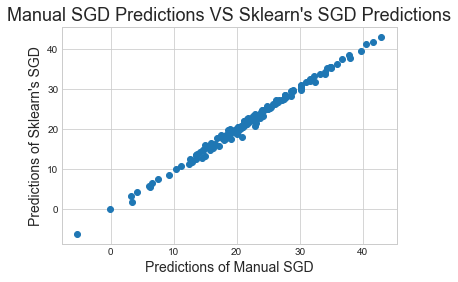

In [18]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.scatter(manual_sgd_predictions, sklearn_sgd_predictions)
plt.xlabel("Predictions of Manual SGD",size=14)
plt.ylabel("Predictions of Sklearn's SGD",size=14)
plt.title("Manual SGD Predictions VS Sklearn's SGD Predictions",size=18)
plt.show()

### OBSERVATION :
By observing the graphs , mean absolute error , mean squared error and root mean squared error for both (Manual sgd Regression and Sklearn's sgd Regression) implementation of SGD we can say that Manual SGD model and Sklearn's SGD model is giving approximately similar results

### CONCLUSION :
(a). Procedure Followed :

STEP 1 :- Load the boston data

STEP 2 :- Column standardized the data and split it into train_data and test_data

STEP 3 :- Implement Manual SGD Regression

STEP 4:- Draw scatter plot of Actual Prices vs Predicted Prices for Manual sgd implementation

STEP 5:- Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) for Manual sgd implementation

STEP 6:- Implement Sklearn's SGD Regression

STEP 7:- Draw scatter plot of Actual Prices vs Predicted Prices for Sklearn's sgd implementation

STEP 8:- Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) for Sklearn's sgd implementation

STEP 9:- Compare the weights produced by both Manual SGD and Sklearn's SGD

STEP 10:- Draw Scatter Plot of the predictions of both manual SGD Regression and sklearn's SGD Regression